In [1]:
''' frist of all install all liabray
!pip install libary_name

'''

' frist of all install all liabray\n!pip install libary_name\n\n'

In [2]:
# import all necessary libary
import pandas as pd # pd is sort of pandas
import numpy as np
import matplotlib.pyplot as plt # too work as---from matplotlib import pyplot
import warnings as wr # it's for unnecessary warning
wr.filterwarnings('ignore')

In [3]:
# for read data set
df = pd.read_csv('height-weight.csv')
df.head() # head() for pritn frist 5 row's

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail() # head() for pritn last 5 row's

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape # it's for chek how many colums and row in a data set

(3501, 2)

In [6]:
row, colum = df.shape # it's for viw row and colum number differently

In [7]:
row

3501

In [8]:
colum

2

In [9]:
df[2:5] # for specipic row viw

,Height,Weight
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height-Weight Chat')

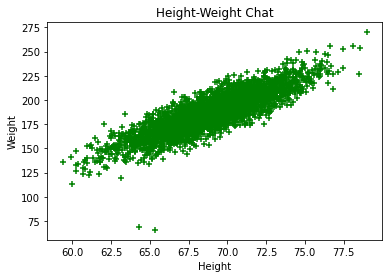

In [10]:
plt.scatter(df[['Height']],df[['Weight']], color = 'green', marker = '+') 
    #scatter for viw data in statistic by poin
    # y is height, x is weiht
plt.xlabel('Height') # x label in chat
plt.ylabel('Weight') # y label in chatt
plt.title('Height-Weight Chat') # title in chat

In [11]:
df.Height.mean() # for avarage value

69.02441087268797

In [12]:
df.Weight.mean()

186.89125797946284

In [13]:
# splitting data set into train and test

In [14]:
from sklearn.model_selection import train_test_split as tts #this libary for train and test data

In [15]:
y = df[['Weight']] #it's for twodimantional
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [16]:
x = df.drop('Weight',axis = 1) 
# spliting data by drop() function
# axis 1 is row and axis 0 is colums
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [17]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.33, random_state=42) #traning and testing data set

In [18]:
x_train.head(2) #data trained

,Height
1048,71.064105
3025,74.319890


In [19]:
x_test.head(2)

,Height
211,70.324753
1454,67.271615


In [20]:
y_train.head(2)

,Weight
1048,200.684160
3025,210.041703


In [21]:
y_test.head(2)

,Weight
211,193.346560
1454,182.898115


# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression #import libary

In [23]:
reg = LinearRegression() # create object for LinearRegression

In [24]:
reg

LinearRegression()

In [25]:
reg.fit(x_train, y_train) # fit is for traning model

LinearRegression()

In [26]:
reg.predict([[73.847017]]) # predict data by value

array([[215.43210274]])

In [27]:
m = reg.coef_ # m is cofitiant value
m

array([[5.93992915]])

In [28]:
c = reg.intercept_  # c is intercept value
c

array([-223.21394581])

In [29]:
predicted = (m*2000)+ c # predicted is adding a extra row and predict value
predicted

array([[11656.64434433]])

In [30]:
reg.predict(x_test) # predict for X_test-testing data

array([[194.51010677],
       [176.37468272],
       [187.48625638],
       ...,
       [184.37586024],
       [192.87632242],
       [163.21758048]])

In [31]:
# for showing predicted colum
df2 = df.copy() # df2 is copy data set

In [32]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [33]:
df2['predicted'] = reg.predict(df2[['Height']])
df2.head(3)

,Height,Weight,predicted
0,73.847017,241.893563,215.432103
1,68.781904,162.310473,185.345691
2,74.110105,212.740856,216.994829


# Best fit line

InvalidIndexError: (slice(None, None, None), None)

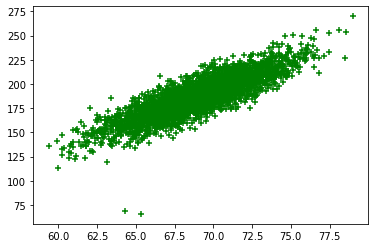

In [34]:
plt.scatter(df[['Height']],df[['Weight']], color = 'green', marker = '+') 
    #scatter for viw data in statistic by poin
    # y is height, x is weiht
plt.plot(x_test, reg.predict(x_test))
plt.xlabel('Height') # x label in caht
plt.ylabel('Weight') # y label in caht
plt.title('Height-Weight Chat') # title in caht

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  #import libary for testing and traning mse-mae

In [37]:
# for testing MSE

test_mse = mean_squared_error(y_test, reg.predict(x_test)) # y_test is actual ,reg.predict(x_test) is predicted y
test_mse

102.04820659488415

In [38]:
# for testing MAE

test_mae = mean_absolute_error(y_test, reg.predict(x_test))
test_mae

8.153581219908506

In [39]:
# for traning  MSE
test_mse = mean_squared_error(y_train, reg.predict(x_train))
test_mse

107.9565128103043

In [40]:
# for traning  MAE
test_mae = mean_absolute_error(y_train, reg.predict(x_train))
test_mae

8.024634559258077